## Importing dataset and modules

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

issues_dataset = pd.read_csv('../data/dataset-backup2.csv')
issues_dataset = issues_dataset.loc[issues_dataset['td-label'] != '-'].drop(['Unnamed: 0'], axis=1)

def plot_hist(data, x_label="", y_label="", title="", bins=5):
    # matplotlib histogram
    plt.hist(data, color = 'blue', edgecolor = 'black', bins=bins)

    # Add labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

## RQ0 - Demographics

## RQ1 - What is the proportion of sections with TD in issues which involves bots?

In [2]:
#Propoprtion in the whole dataset
sections_with_td = issues_dataset.loc[issues_dataset['td-label'] != 'non-SATD']
len(sections_with_td)/len(issues_dataset)

0.07058083785270769

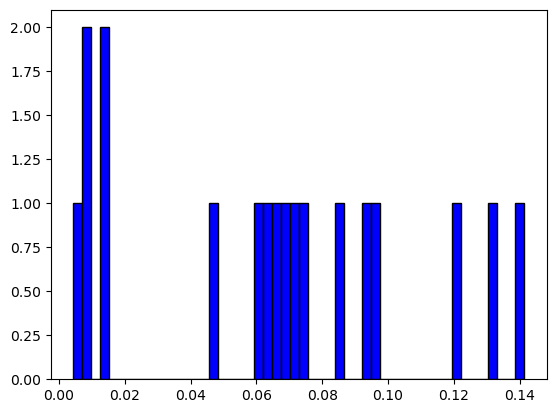

,issue
bot,
0crat,0.045807
DartBot,0.069423
ant-design-bot,0.008040
babel-bot,0.131718
brotherlogic,0.013699
cf-gitbot,0.094510
element-bot,0.004399
fejta-bot,0.141318
fire-bot,0.014553


In [29]:
#Proportion per bot
proportions_per_bot = sections_with_td.loc[:,['issue','bot']].groupby('bot').count()/issues_dataset.loc[:,['issue','bot']].groupby('bot').count()
plot_hist(proportions_per_bot, bins=50)
proportions_per_bot

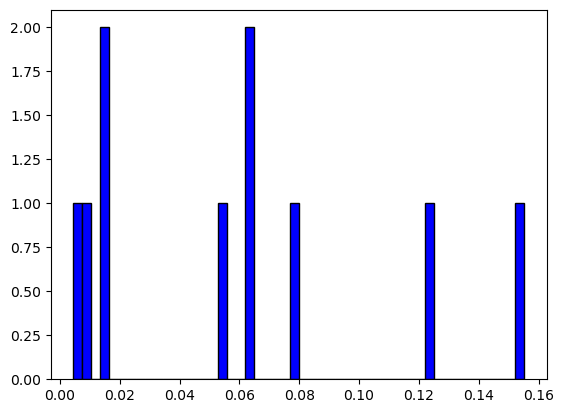

                    issue
bot                      
0crat                 NaN
DartBot          0.078337
ant-design-bot        NaN
babel-bot        0.063745
brotherlogic     0.013986
cf-gitbot             NaN
element-bot           NaN
fejta-bot        0.053140
fire-bot         0.007673
gitcoinbot            NaN
glassfishrobot   0.063808
google-oss-bot        NaN
gopherbot        0.123333
k8s-ci-robot     0.014851
msft-github-bot       NaN
openshift-bot         NaN
rultor           0.004505
swift-ci         0.155143
                issue
bot                  
DartBot            81
babel-bot          16
brotherlogic        6
fejta-bot          11
fire-bot            3
glassfishrobot    125
gopherbot          74
k8s-ci-robot        3
rultor              4
swift-ci           92
                 issue
bot                   
0crat              364
DartBot           1034
ant-design-bot     270
babel-bot          251
brotherlogic       429
cf-gitbot          201
element-bot        200
fejta-bot

In [47]:
#Proportions in sections created by bots

sections_gernerate_by_bots = issues_dataset.loc[issues_dataset['bot'] == issues_dataset['author-login']]

sections_td = sections_gernerate_by_bots.loc[sections_gernerate_by_bots['td-label'] == 'SATD',['issue','bot']]
section_non_td = sections_gernerate_by_bots.loc[sections_gernerate_by_bots['td-label'] == 'non-SATD', ['issue','bot']]

proportions = sections_td.groupby('bot').count()/section_non_td.groupby('bot').count()
plot_hist(proportions, bins=50)
print(proportions)
print(sections_td.groupby('bot').count())
print(section_non_td.groupby('bot').count())